### Created by: Anthony D. Cho
### Last update: 20.11.2021

**Subject**: Classification (Keras - Tensorflow) - Applied to Breast Cancer Coimbra


In [1]:
import warnings
warnings.filterwarnings('ignore')

from time import time
from numpy import round
from pandas import read_csv
import matplotlib.pyplot as plt
%matplotlib inline

## Encoding function
from sklearn.preprocessing import LabelBinarizer # dummy Encoding

## Pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Metrics
from sklearn.metrics import classification_report, confusion_matrix

## Keras from tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

### Customized function

In [2]:
def plot_history(history, width=12, height=6):
  """
  DESCRIPTION:
    History performance of the keras model
  
  INPUT:
    @param history: history of performance of fitted model
    @type history: tensorflow.python.keras.callbacks.History

  OUTPUT:
    A graphic
  """

  ## Metrics keys stored in tensorflow object
  keys = list(history.history.keys())

  ## Number of epoch used for fit the model
  epoch = range(1, len(history.epoch) +1)

  ## Check if validation set was used.
  withValidation = False
  for key in keys:
    if 'val' in key:
      withValidation = True

  ## Number of metrics 
  nMetrics = len(keys)
  if withValidation:
    nMetrics = nMetrics//2

  ## Plot-space instance
  plt.figure(figsize=(width, height))

  for i in range(nMetrics):
    plt.subplot(nMetrics, 1, i+1)

    ## Plot (train) metric value
    labelMetric = keys[i]
    metric = history.history[keys[i]]
    plt.plot(epoch, metric, 'o-', label=labelMetric)

    if withValidation:
      ## Plot (validation) metric value
      labelMetricVal = keys[i+nMetrics]
      metricVal = history.history[keys[i+nMetrics]]
      plt.plot(epoch, metricVal, 'o-', label=labelMetricVal)

    plt.xlim(epoch[0], epoch[-1])
    plt.legend()
    plt.grid()

  plt.xlabel('Epoch')
  plt.show()

# Problem: Breast Cancer Coimbra

**Target**: Classification (1: No, 2: Yes)

## Data loading

Source: [Breast Cancer Coimbra](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra)

In [3]:
## Load data
data = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')

## Feature names list
feature_names = data.columns[:-1]

In [4]:
data.head(4)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1


## Data pre-processing

In [5]:
## Predictors and target assignment
X = data.drop(columns=['Classification'])
y = data['Classification']

## Partition sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20200803)

## Standardizing
scale = MinMaxScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

## One-Hot Encoder a las etiquetas target
labelsY = y_train.unique().sort()
y_train = to_categorical(y_train)[:,-1]
y_test = to_categorical(y_test)[:,-1]

## Display data shape
print('(train shape) X: {}, y: {}'.format(X_train.shape, y_train.shape))
print('(test shape) X: {}, y: {}'.format(X_test.shape, y_test.shape))

(train shape) X: (87, 9), y: (87,)
(test shape) X: (29, 9), y: (29,)


### Model building

In [6]:
## Model instance

model = Sequential(name='Classification')
model.add(layers.Input( shape=(X_train.shape[1],), name='Input' ))
model.add(layers.Dense(units=32, 
                       activation='relu', 
                       name='HiddenLayer_1'))
model.add(layers.Dense(units=16, 
                       activation='relu',
                       name='HiddenLayer_2'))
model.add(layers.Dense(units=1,
                       activation='sigmoid', 
                       name='output'))
model.summary()

Model: "Classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer_1 (Dense)        (None, 32)                320       
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [7]:
start = time()

## Compiler setting
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## model fitting
history = model.fit(x=X_train, y=y_train, 
                    validation_split=0.15,
                    epochs=200, 
                    batch_size=10)

stop = time()
print('Time spent[s]: {:2f}'.format(stop -start))

Epoch 1/200
8/8 [==============================] - 1s 75ms/step - loss: 0.6883 - accuracy: 0.5436 - val_loss: 0.6883 - val_accuracy: 0.6429
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6779 - accuracy: 0.6733 - val_loss: 0.6875 - val_accuracy: 0.5714
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6738 - accuracy: 0.7137 - val_loss: 0.6857 - val_accuracy: 0.5714
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6670 - accuracy: 0.6780 - val_loss: 0.6849 - val_accuracy: 0.5714
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6723 - accuracy: 0.6498 - val_loss: 0.6844 - val_accuracy: 0.6429
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6588 - accuracy: 0.7358 - val_loss: 0.6835 - val_accuracy: 0.6429
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6529 - accuracy: 0.7676 - val_loss: 0.6820 - val_accuracy: 0.6429
Epoch 8/200
8/8 [=========

8/8 [==============================] - 0s 7ms/step - loss: 0.3809 - accuracy: 0.8626 - val_loss: 0.5592 - val_accuracy: 0.7857
Epoch 60/200
8/8 [==============================] - 0s 8ms/step - loss: 0.3996 - accuracy: 0.8128 - val_loss: 0.5598 - val_accuracy: 0.7857
Epoch 61/200
8/8 [==============================] - 0s 8ms/step - loss: 0.3812 - accuracy: 0.8508 - val_loss: 0.5643 - val_accuracy: 0.7143
Epoch 62/200
8/8 [==============================] - 0s 7ms/step - loss: 0.3361 - accuracy: 0.8503 - val_loss: 0.5614 - val_accuracy: 0.7143
Epoch 63/200
8/8 [==============================] - 0s 7ms/step - loss: 0.3470 - accuracy: 0.8711 - val_loss: 0.5556 - val_accuracy: 0.7857
Epoch 64/200
8/8 [==============================] - 0s 7ms/step - loss: 0.3716 - accuracy: 0.7852 - val_loss: 0.5577 - val_accuracy: 0.7857
Epoch 65/200
8/8 [==============================] - 0s 8ms/step - loss: 0.4054 - accuracy: 0.8346 - val_loss: 0.5591 - val_accuracy: 0.7857
Epoch 66/200
8/8 [===============

8/8 [==============================] - 0s 7ms/step - loss: 0.2080 - accuracy: 0.9352 - val_loss: 0.6244 - val_accuracy: 0.8571
Epoch 118/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1937 - accuracy: 0.9668 - val_loss: 0.6202 - val_accuracy: 0.8571
Epoch 119/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2143 - accuracy: 0.9564 - val_loss: 0.6164 - val_accuracy: 0.8571
Epoch 120/200
8/8 [==============================] - 0s 7ms/step - loss: 0.2120 - accuracy: 0.9263 - val_loss: 0.6234 - val_accuracy: 0.8571
Epoch 121/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1902 - accuracy: 0.9744 - val_loss: 0.6370 - val_accuracy: 0.7857
Epoch 122/200
8/8 [==============================] - 0s 7ms/step - loss: 0.2100 - accuracy: 0.9477 - val_loss: 0.6501 - val_accuracy: 0.7857
Epoch 123/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1795 - accuracy: 0.9619 - val_loss: 0.6394 - val_accuracy: 0.8571
Epoch 124/200
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.1514 - accuracy: 0.9474 - val_loss: 0.7818 - val_accuracy: 0.8571
Epoch 176/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1069 - accuracy: 0.9746 - val_loss: 0.7833 - val_accuracy: 0.8571
Epoch 177/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0960 - accuracy: 0.9843 - val_loss: 0.7921 - val_accuracy: 0.8571
Epoch 178/200
8/8 [==============================] - 0s 8ms/step - loss: 0.1269 - accuracy: 0.9530 - val_loss: 0.7992 - val_accuracy: 0.8571
Epoch 179/200
8/8 [==============================] - 0s 8ms/step - loss: 0.1498 - accuracy: 0.9635 - val_loss: 0.8024 - val_accuracy: 0.8571
Epoch 180/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1336 - accuracy: 0.9594 - val_loss: 0.8035 - val_accuracy: 0.8571
Epoch 181/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1021 - accuracy: 0.9889 - val_loss: 0.8069 - val_accuracy: 0.8571
Epoch 182/200
8/8 [========

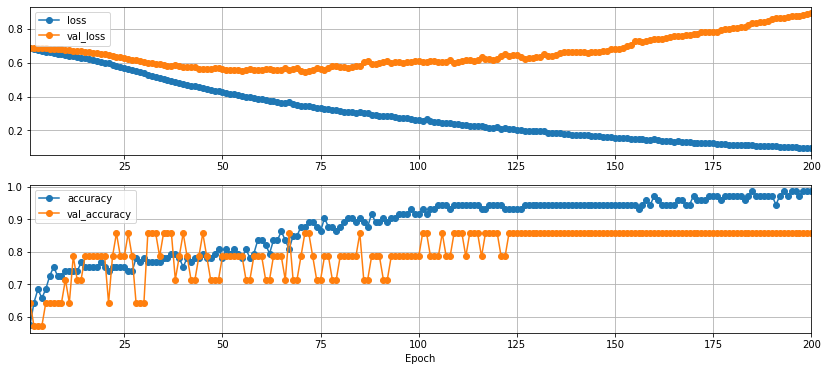

1/1 [==============================] - 0s 21ms/step - loss: 1.3280 - accuracy: 0.7241


[1.3279883861541748, 0.7241379022598267]

In [8]:
plot_history(history, width=14)

## Compute model evaluation using test set
model.evaluate(X_test, y_test)

In [9]:
## Compute predictions using test data
prediction = model.predict(X_test)
prediction.flatten()

array([5.55358529e-02, 1.39544278e-01, 9.98211265e-01, 9.53024745e-01,
       9.72964585e-01, 1.20429814e-01, 1.00000000e+00, 7.66473114e-02,
       9.99978185e-01, 9.16590989e-01, 6.21846318e-03, 4.67673331e-01,
       9.99666572e-01, 7.37757444e-01, 6.37337089e-01, 9.95825052e-01,
       9.99844134e-01, 1.26034021e-04, 2.18221277e-01, 5.94211519e-02,
       8.96604836e-01, 2.76241958e-01, 9.64592993e-02, 9.99664068e-01,
       9.94407713e-01, 8.98048878e-01, 9.97754633e-01, 9.99985218e-01,
       4.74874079e-02], dtype=float32)

In [11]:
## Decodifying prediction to class
predictionClass = round(prediction.flatten())
predictionClass

array([0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)

In [13]:
## Display confusion matrix
confusion_matrix(y_true=y_test, y_pred=predictionClass)

array([[ 8,  4],
       [ 4, 13]])

In [14]:
## Display classification report
print(classification_report(y_true=y_test, y_pred=predictionClass))

              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67        12
         1.0       0.76      0.76      0.76        17

    accuracy                           0.72        29
   macro avg       0.72      0.72      0.72        29
weighted avg       0.72      0.72      0.72        29



## Best model

Looking into the performance charts, it seems to stabilize (kind of overfit) starting at epoch 55.

In [15]:
## Model instance

model = Sequential(name='Classification')
model.add(layers.Input( shape=(X_train.shape[1],), name='Input' ))
model.add(layers.Dense(units=32, 
                       activation='relu', 
                       name='HiddenLayer_1'))
model.add(layers.Dense(units=16, 
                       activation='relu',
                       name='HiddenLayer_2'))
model.add(layers.Dense(units=1,
                       activation='sigmoid', 
                       name='output'))
model.summary()

Model: "Classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer_1 (Dense)        (None, 32)                320       
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [16]:
start = time()

## Compiler setting
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## model fitting
history = model.fit(x=X_train, y=y_train, 
                    epochs=55, 
                    batch_size=10)

stop = time()
print('Time spent[s]: {:2f}'.format(stop -start))

Epoch 1/55
9/9 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5914
Epoch 2/55
9/9 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6007
Epoch 3/55
9/9 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5442
Epoch 4/55
9/9 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5194
Epoch 5/55
9/9 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.5496
Epoch 6/55
9/9 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.5848
Epoch 7/55
9/9 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5416
Epoch 8/55
9/9 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.5433
Epoch 9/55
9/9 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.5477
Epoch 10/55
9/9 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.5157
Epoch 11/55
9/9 [======================

In [17]:
## Compute prediction
prediction = model.predict(X_test)
prediction.flatten()

## Decodifying prediction to class
predictionClass = round(prediction.flatten())
predictionClass

## Display confusion matrix
confusion_matrix(y_true=y_test, y_pred=predictionClass)

array([[ 8,  4],
       [ 3, 14]])

In [18]:
## Display classification report
print(classification_report(y_true=y_test, y_pred=predictionClass))

              precision    recall  f1-score   support

         0.0       0.73      0.67      0.70        12
         1.0       0.78      0.82      0.80        17

    accuracy                           0.76        29
   macro avg       0.75      0.75      0.75        29
weighted avg       0.76      0.76      0.76        29

